Homework 4 Assignment 1

Author - dp1618


Test if the distribution of ages is the same using the Pearson's Test, Spearman's Test and KS Test for:
1. day and night riders 
2. male and female riders

Alpha (confidence level) = .05 for all tests

In [1]:
#import statements
import os
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#imort csv
df = pd.read_csv('201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# Test if the Distributions of Ages are the same by Gender (Male vs Female)

Use the following tests:
1. The Pearson's Test
2. The Spearman's Test
3. The KS Test

In [30]:
#separate the data into male and female and extracting the age

df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [31]:
print df.ageM

0          NaN
1         True
2         True
3         True
4         True
5          NaN
6         True
7          NaN
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24         NaN
25        True
26         NaN
27         NaN
28         NaN
29        True
          ... 
285522    True
285523    True
285524    True
285525    True
285526     NaN
285527    True
285528    True
285529    True
285530    True
285531    True
285532     NaN
285533     NaN
285534    True
285535    True
285536    True
285537    True
285538    True
285539    True
285540    True
285541    True
285542    True
285543     NaN
285544    True
285545    True
285546    True
285547    True
285548    True
285549    True
285550    True
285551    True
Name: ageM, dtype: object


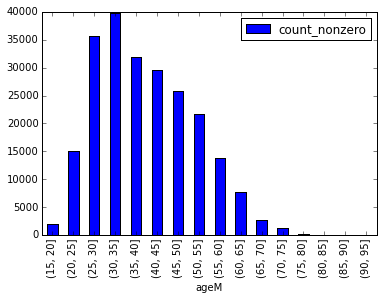

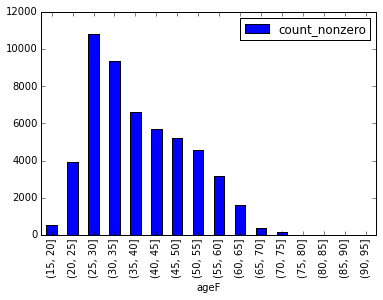

In [27]:
#plot the dataset in 5 year bins ranging from 10 - 99
bins = np.arange(15,99,5)

df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')

          count_nonzero
ageM                   
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


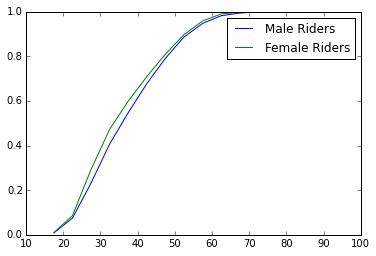

In [28]:
#find the cumulative sums of male and female riders

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())
pl.plot(bins[:-1] + 2.5, csM / csM.max(), label = "Male Riders")
pl.plot(bins[:-1] + 2.5, csF / csF.max(), label = "Female Riders")
pl.legend()

#KS Test

In [21]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.61519793242561782, 0.0)


the KS statistic is 0.61519793242561782 and the p-value is 0.0

#Pearson's Test

In [22]:
pearson=scipy.stats.pearsonr(df.ageM, df.ageF)
print pearson

(nan, 1.0)


#Spearman's Test

In [23]:
spearman = scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)
print spearman

(-0.43552302983795976, 0.0)


# Test if the Distributions of Ages are the same by Day and Night 
Day will be defined as trip start times between 6AM and 6PM
Night will be defined as trip start times between 6PM and 6AM

Use the following tests:
1. The Pearson's Test
2. The Spearman's Test
3. The KS Test

In [ ]:
#separate the data into day and night and extract the age
df['starthour'] = pd.DatetimeIndex(df['starttime']).hour
df['ageDay'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starthour'] >= 6) & (df['starthour'] < 18)]
df['ageNight'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['starthour'] < 6) | (df['starthour'] >= 18))]

In [ ]:
print df.columns

In [ ]:
#plot the dataset in 5 year bins ranging from 10 - 99
bins = np.arange(15,99,5)
df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')
df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([count_nonzero]).plot(kind='bar', color='blue')

In [ ]:
#find the cumulative sums of day and night riders

csD=df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([count_nonzero]).cumsum()
csN=df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max() - csN / csN.max())
pl.plot(bins[:-1] + 2.5, csD / csD.max(), label = "Day Riders")
pl.plot(bins[:-1] + 2.5, csN / csN.max(), label = "Night Riders")
pl.legend()

# KS Test

In [14]:
ks=scipy.stats.ks_2samp(df.ageDay, df.ageNight)
print ks

(0.41810248220989527, 0.0)


#Pearson Test

In [15]:
pearson=scipy.stats.pearsonr(df.ageM, df.ageF)
print pearson

(nan, 1.0)


#Spearman's Test

In [16]:
spearman = scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)
print spearman

(-0.43552302983795976, 0.0)
